In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sys
import pandas as pd

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [3]:
y.shape

(150,)

In [4]:
np.unique(y)

array([0, 1, 2])

In [5]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=10000, verbose=False, multi_class=False):
        self.lr = lr
        self.num_iter = num_iter
        self.verbose = verbose
        self.multi_class = multi_class
        self.weights = None
        self.bias = None
        self.x = None
        self.y = None
        self.classes_ = None
        self.m = None
        self.n = None
        self.losses = []
        self.accuracies = []

    def softmax(self, x):
        e_x = np.exp(x) 
        return e_x / e_x.sum(axis=1, keepdims=True)

    def gradient_descent(self):
        y_hat = self.predict(self.x)
        # print(y_hat)
        dw = (1 / self.m) * np.dot(self.x.T, (y_hat - self.y))
        db = (1 / self.m) * np.sum(y_hat - self.y)
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        predication = 1.0 / (1 + np.exp(-z))
        if self.multi_class:
            return self.softmax(predication)
        return predication

    def plot(self):
        plt.plot(self.losses)
        plt.plot(self.accuracies)
        plt.xlabel("Number of iterations")
        plt.ylabel("Loss")
        plt.legend(["Loss", "Accuracy"])
        plt.show()

    def loss(self):
        y_hat = self.predict(self.x)
        self.losses.append(
            (-1 / self.m)
            * np.sum(
                self.y * np.log(y_hat + sys.float_info.min)
                + (1 - self.y) * np.log(1 - y_hat + sys.float_info.min)
            )
        )
        return self.losses[-1]

    def accuracy(self):
        y_hat = self.predict(self.x)
        self.accuracies.append(
            np.sum(y_hat.argmax(axis=1) == self.y.argmax(axis=1)) / self.m
        )

    def fit(self, x, y):    
        self.x = x
        self.y = y
        if self.multi_class:
            self.classes_ = np.unique(self.y)
            self.y = pd.get_dummies(self.y).values
            self.n = x.shape[1]
            self.m = x.shape[0]
            self.weights = np.random.rand(self.n, len(self.classes_))
            self.bias = np.random.rand(len(self.classes_))
        else:
            self.m, self.n = x.shape
            print(f"Number of features: {self.n}, Number of samples: {self.m}")
            self.weights = np.random.rand(self.n)
            self.bias = np.random.rand()
        for _ in range(self.num_iter):
            self.gradient_descent()
            self.loss()
            self.accuracy()
            if self.verbose:
                print(f"\tLoss: {self.losses[-1]}")
                print(f"\tAccuracy: {self.accuracies[-1]}")
        print(f"Final weights: {self.weights}")
        print(f"Final bias: {self.bias}")
    def eval(self, x, y):
        self.x = x
        self.y = y
        if self.multi_class:
            self.y = pd.get_dummies(self.y).values
        self.accuracy()
        print(f"Accuracy: {self.accuracies[-1]}")

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
# y_train = np.where(y_train == 2, 1, 0)

In [8]:
np.unique(y_train)

array([0, 1, 2])

In [9]:
model = LogisticRegression(multi_class=True)

In [10]:
model.fit(x_train, y_train)

Final weights: [[  3.05310888   0.46861476  -2.45024198]
 [ 18.94236586  -3.56240876 -13.44795385]
 [-36.24448308   2.16566342  35.86821278]
 [-16.22506656  -1.61733734  18.83925679]]
Final bias: [0.24491458 0.83449535 0.46190845]


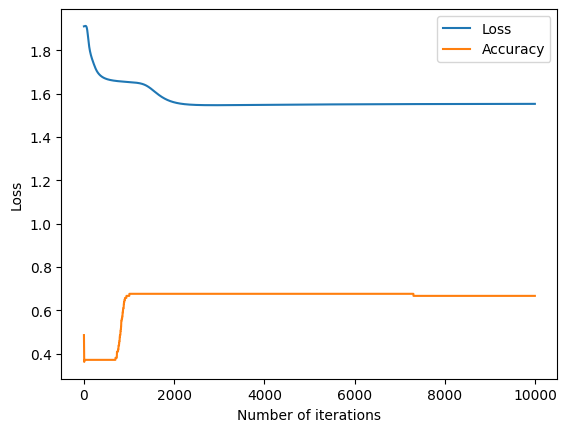

In [11]:
model.plot()

In [12]:
model.eval(x_test, y_test)

Accuracy: 0.24761904761904763
